# Average Hourly Activity Analysis

In [1]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns
sns.set()

In [2]:
#Plan
    #Take average activity across the columns (average spider activity at each time point) --> new df
    #Then plot - bar plot where x = time, y = activity count
    #In comparison, find moving average across the time values --> new df, if necessary
    #Plot - bar plot where x = time, y = activity count

## Red Light, DD & LD

In [3]:
df1 = pd.read_csv("Parasteadoda red ligt and DD_LD_only.csv")
#drop empty rows
df1["Light"].replace(" ", np.nan, inplace= True)
df1.dropna(subset = ["Light"], inplace= True)
df1["index"]= pd.to_datetime(df1["index"])
#Add new time elapsed column
days = pd.to_datetime(df1["index"])- pd.to_datetime(df1.at[901, "index"])
df1["days_since"] = days
df1 = df1.set_index("index")

<Axes: title={'center': '8hr Moving Average of Parasteadoda Activity in DD'}, xlabel='Date', ylabel='Activity (Crossings)'>

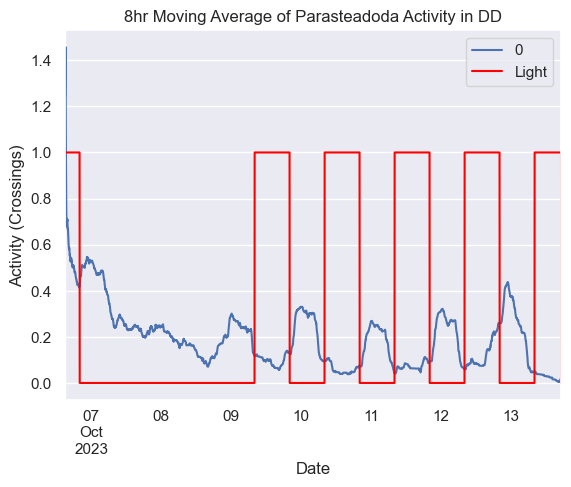

In [4]:
#Average activity
df_avg1 = pd.DataFrame(df1.iloc[:,1:26].mean(axis = 1))
df_avg1
#Rolling window
roll1 = df_avg1.rolling(window = "8H", axis = 0).mean()
roll1.rename(columns ={0:"Average Spider Activity"})
#Plot
roll1.plot(color='b', title = "8hr Moving Average of Parasteadoda Activity in DD", 
           ylabel = "Activity (Crossings)", xlabel = "Date", legend = True)
df1['Light'].plot.line(color='red', xlabel = "Date", legend = True)

## Red Light, DD

In [5]:
df2 = pd.read_csv("Parasteadoda red ligt and DD_DD_only.csv")
df2["index"]= pd.to_datetime(df2["index"])
#drop empty rows
df2["Light"].replace(" ", np.nan, inplace= True)
df2.dropna(subset = ["Light"], inplace= True)
#Create new column with elapsed time
days = pd.to_datetime(df2["index"])- pd.to_datetime(df2.at[0, "index"])
df2["days_since"] = days
#Set time data as index
df2 = df2.set_index("index")

<Axes: title={'center': '8hr Moving Average of Parasteadoda Activity in DD'}, xlabel='Date', ylabel='Activity (Crossings)'>

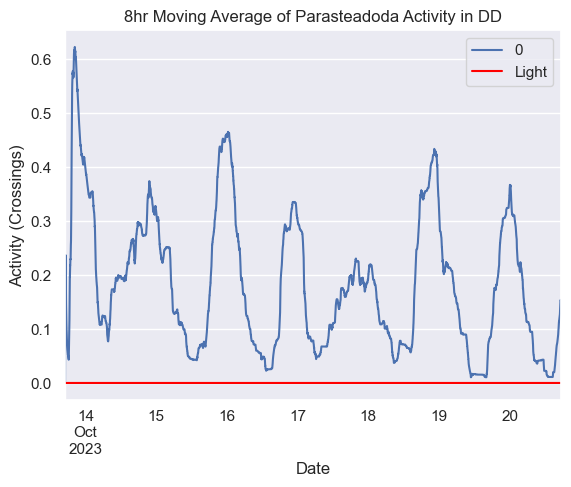

In [6]:
#Average activity
df_avg2 = pd.DataFrame(df2.iloc[:,1:26].mean(axis = 1))
df_avg2
#Rolling window
roll2 = df_avg2.rolling(window = "8H", axis = 0).mean()
roll2.rename(columns ={0:"Average Spider Activity"})
#Plot
roll2.plot(color='b', title = "8hr Moving Average of Parasteadoda Activity in DD", 
           ylabel = "Activity (Crossings)", xlabel = "Date", legend = True)
df2['Light'].plot.line(color='red', xlabel = "Date", legend = True)

<Axes: title={'center': '8hr Moving Average of Parasteadoda Activity'}, xlabel='Date', ylabel='Activity (Crossings)'>

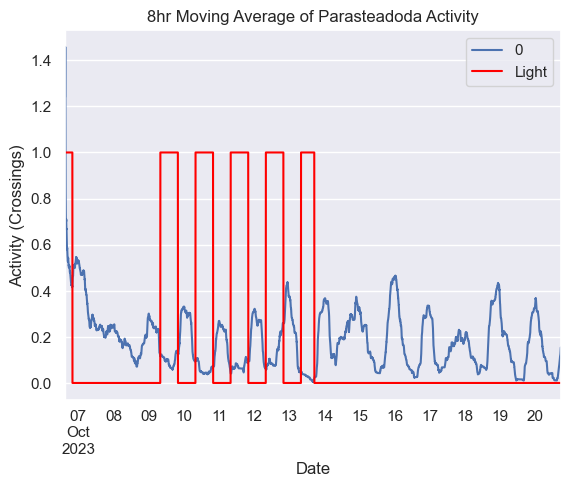

In [35]:
df3 = pd.read_csv("Parasteadoda red ligt and DD.csv")
df3["Date_Time"]= pd.to_datetime(df3["Date_Time"])
#drop empty rows
df3["Light"].replace(" ", np.nan, inplace= True)
df3.dropna(subset = ["Light"], inplace= True)
#Create new column with elapsed time
days = pd.to_datetime(df3["Date_Time"])- pd.to_datetime(df3.at[0, "Date_Time"])
df3["days_since"] = days
#Set time data as index
df3 = df3.set_index("Date_Time")
#Average activity
df_avg3 = pd.DataFrame(df3.iloc[:,1:26].mean(axis = 1))
#Rolling window
roll3 = df_avg3.rolling(window = "8H", axis = 0).mean()
roll3.rename(columns ={0:"Average Spider Activity"})
#Plot
roll3.plot(color='b', title = "8hr Moving Average of Parasteadoda Activity", 
           ylabel = "Activity (Crossings)", xlabel = "Date", legend = True)
df3['Light'].plot.line(color='red', xlabel = "Date", legend = True)